In [17]:
import pandas as pd
import numpy as np
import seaborn as sns 

from sklearn.model_selection import train_test_split

In [18]:
data = pd.read_csv("abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Univariate Analysis

In [19]:
data.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

<AxesSubplot: >

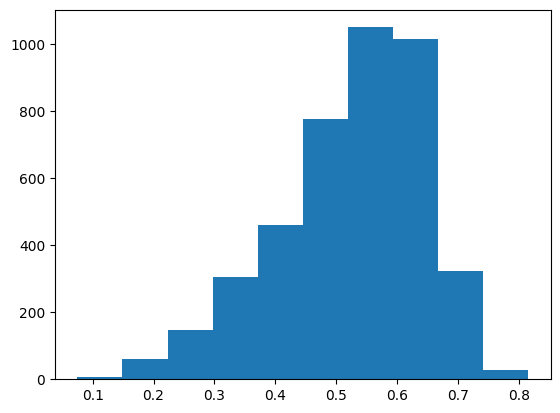

In [20]:
data.Length.hist(grid=False)

### Bivariate Analysis 

<AxesSubplot: xlabel='Diameter', ylabel='Shucked weight'>

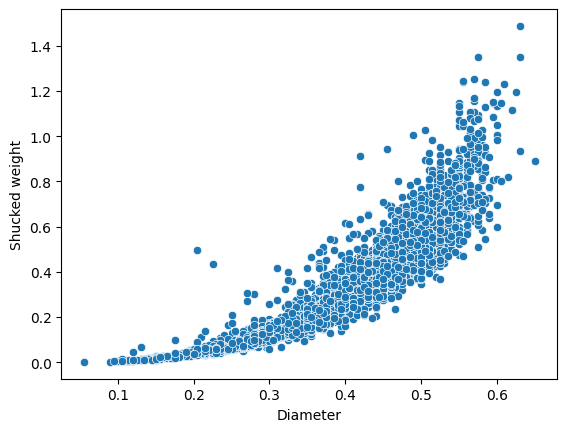

In [21]:
sns.scatterplot(data, x="Diameter", y="Shucked weight")

### Multivariate Analysis

C:\Users\vpra\AppData\Local\Temp\ipykernel_11324\3784163891.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.pairplot(data.corr())


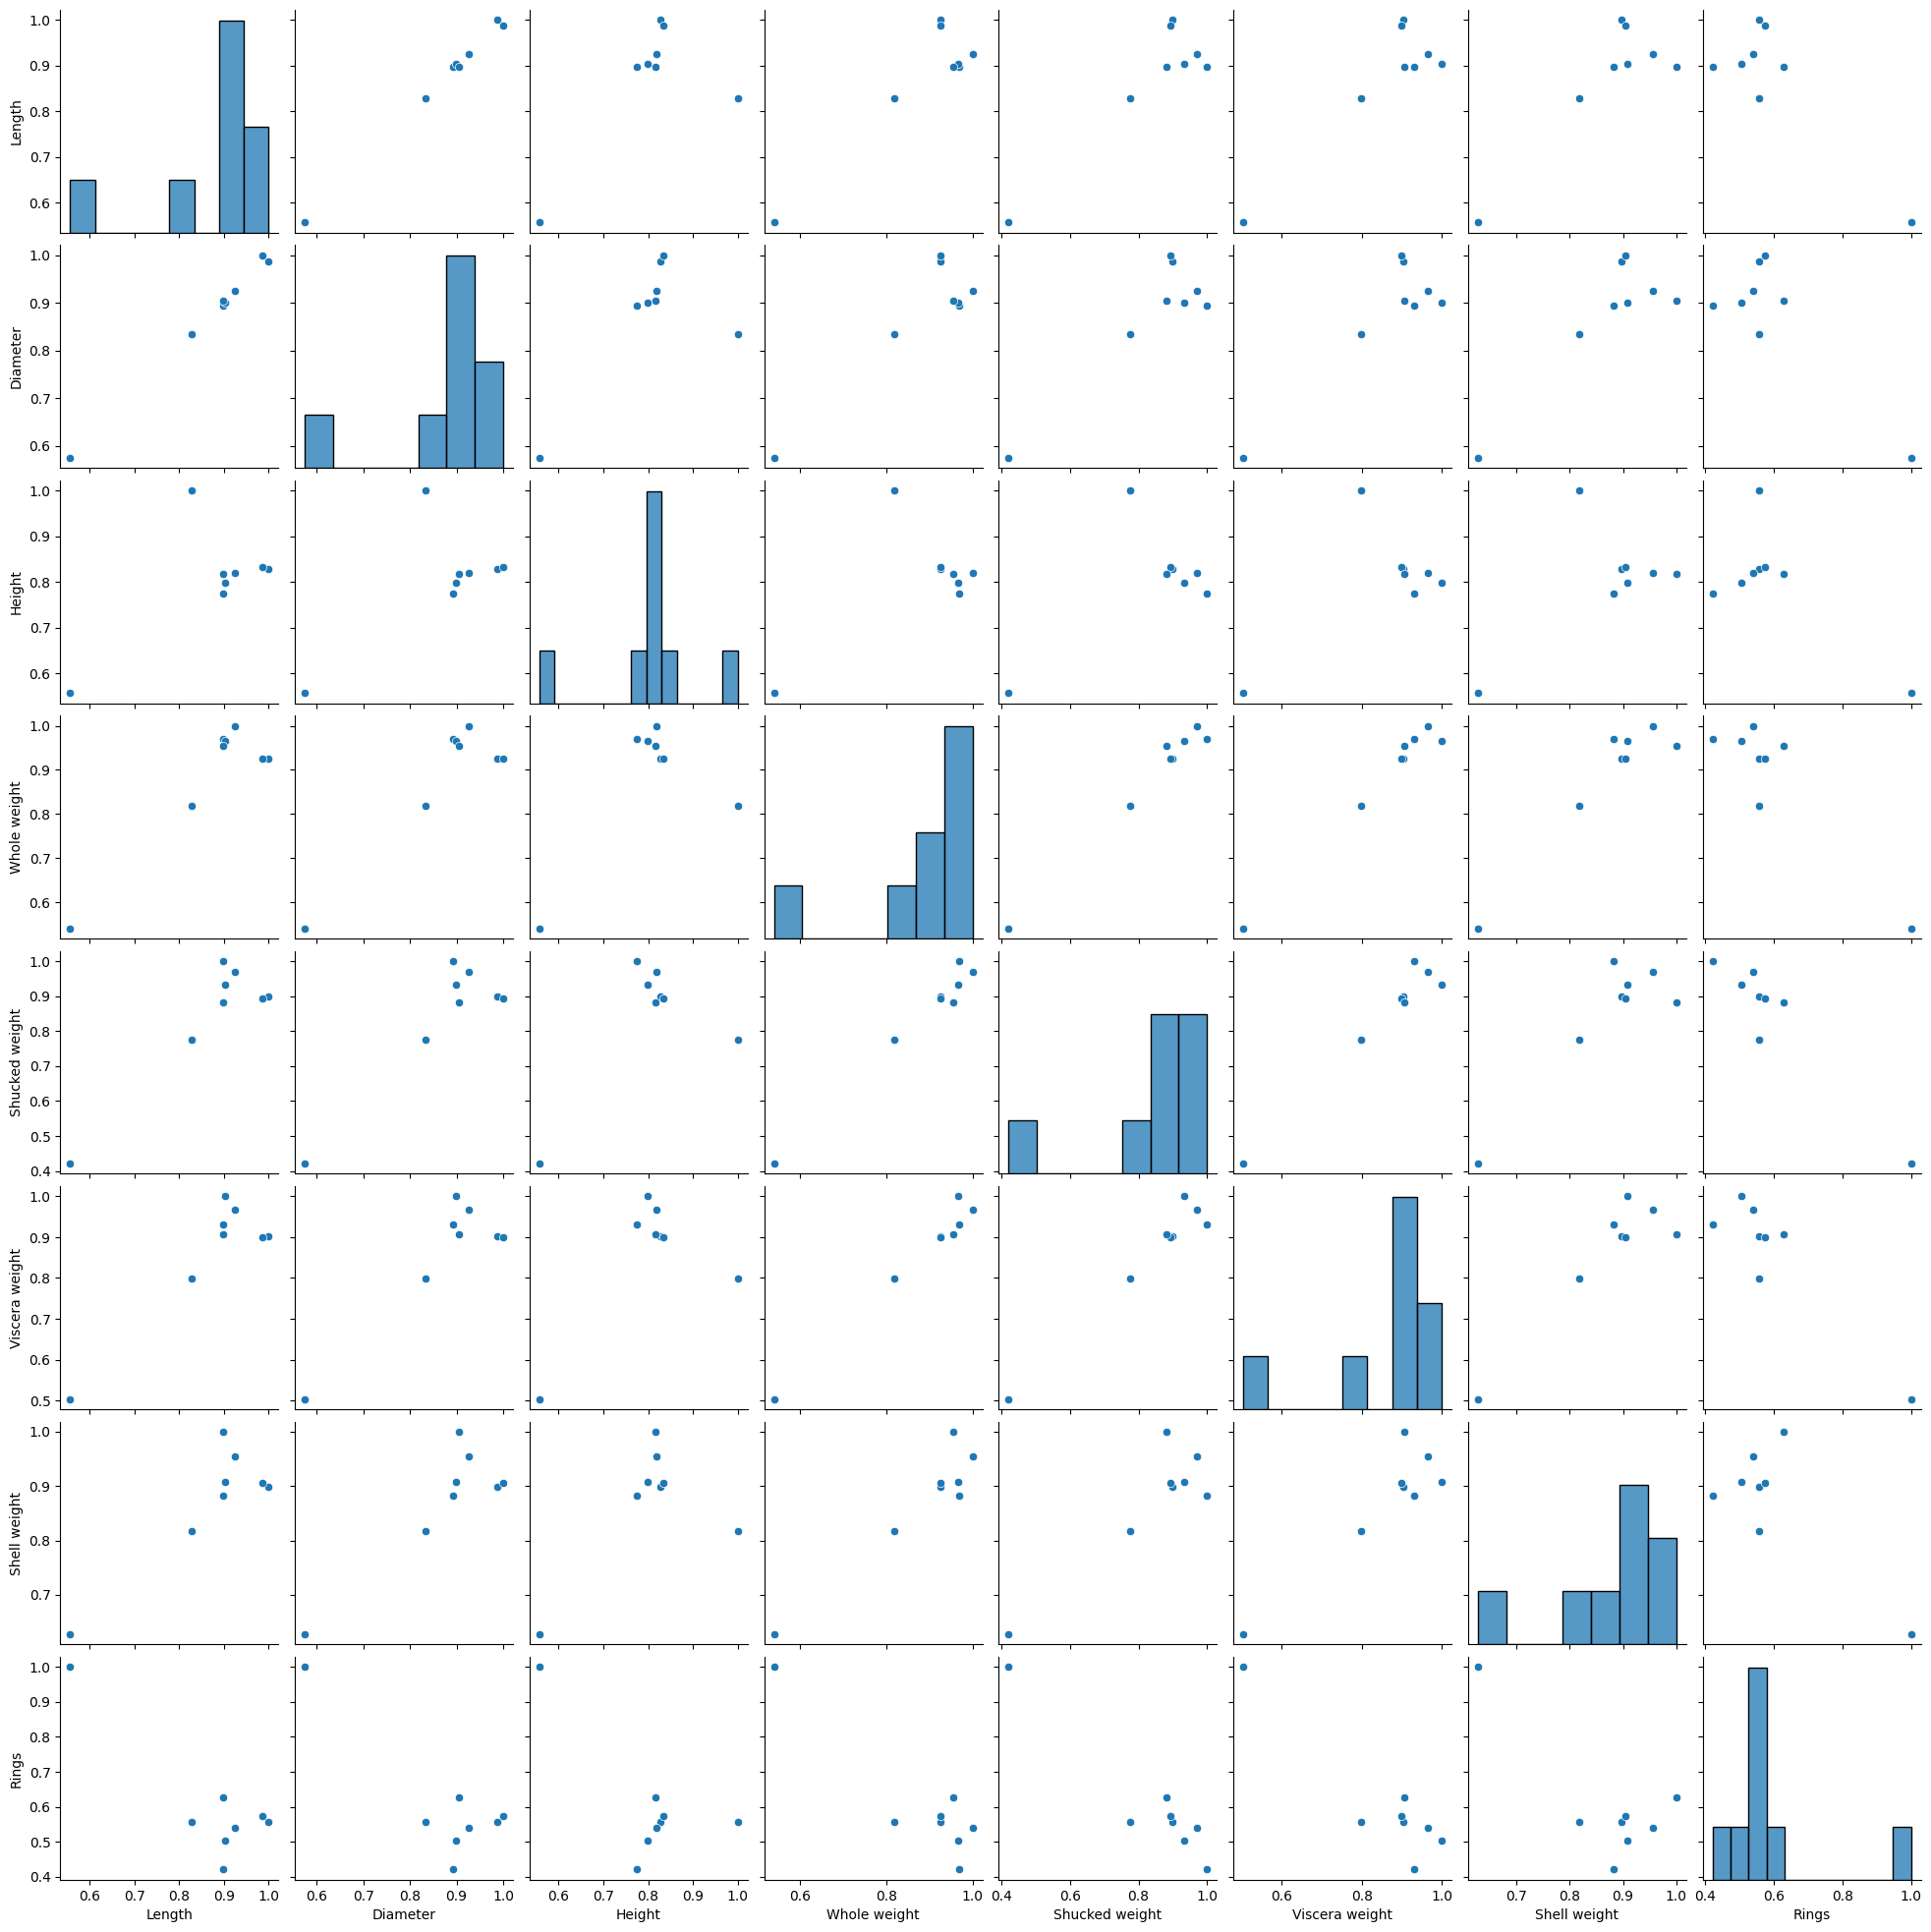

In [22]:
sns.pairplot(data.corr())

### description

In [23]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### missing values

In [24]:
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

### outliars

<AxesSubplot: ylabel='Frequency'>

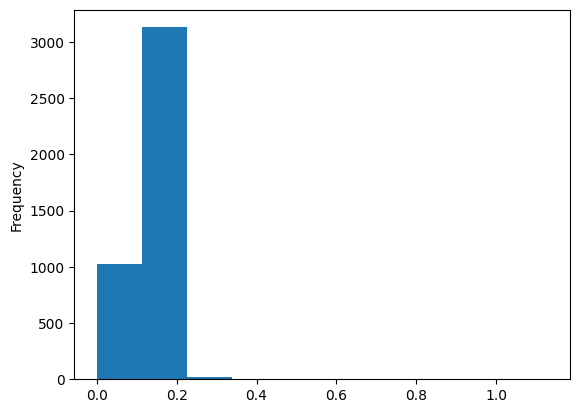

In [25]:
col = "Height"
data.loc[:,col].plot(kind="hist")

In [26]:
data = data.loc[data.Height < 0.2]
data.Height.describe()

count    3955.000000
mean        0.135198
std         0.035414
min         0.000000
25%         0.110000
50%         0.140000
75%         0.160000
max         0.195000
Name: Height, dtype: float64

### dependant and independant varibles

In [27]:
data = pd.get_dummies(data, drop_first=True)
X = data.drop("Rings", axis=1)
y = data.Rings

### split data into train and test

In [28]:

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [29]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

list(map(lambda x:x.shape, [train, test]))

[(2966, 10), (989, 10)]

### model buliding, training and testing

In [30]:
from sklearn.linear_model import ElasticNet

In [31]:
enet = ElasticNet()
enet.fit(X_train, y_train)

ElasticNet()

In [32]:
pred = enet.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error


mean_squared_error(y_test, pred)

9.189268157889389

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
rfr = RandomForestRegressor(max_depth = 10, n_estimators=100, max_features="log2")
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='log2')

In [36]:
rfr_pred = rfr.predict(X_test)

In [37]:
mean_squared_error(y_test, rfr_pred)

4.5332911094829

### performance using metrics

In [38]:
from sklearn.metrics import r2_score


r2_score(y_test, rfr_pred)

0.5360940024809557